In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.utils import shuffle
tf.set_random_seed(0)

In [2]:
from sklearn import datasets

In [3]:
N = 300
X, y = datasets.make_moons(N, noise=0.2)

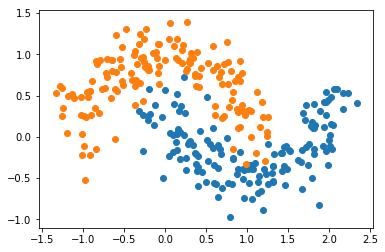

In [4]:
px = X[y==1]
py = X[y==0]
plt.scatter(px[:,0],px[:,1])
plt.scatter(py[:,0],py[:,1])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
Y = y.reshape(N,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [55]:
num_hidden = 3

x = tf.placeholder(tf.float32, shape=[None,2])
t = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.truncated_normal([2,num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x,W) + b)

V = tf.Variable(tf.truncated_normal([num_hidden,1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h,V) + c)

In [56]:
cross_entropy = - tf.reduce_sum( t * tf.log(y) + (1-t) * tf.log(1-y))

In [57]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [58]:
correct_prediction = tf.equal(tf.to_float(tf.greater(y,0.5)),t)

In [59]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [60]:
batch_size = 30
n_batches = N // batch_size

In [61]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [62]:
for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

In [63]:
accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})

In [64]:
print(accuracy_rate)

1.0
